### Dataset Reading

In [ ]:
import pandas as pd  
data = pd.read_excel('drive/My Drive/HASOC Dataset/hasoc_2020_hi_train.xlsx')
pd.set_option('display.max_colwidth',150) 
data

,tweet_id,text,task1,task2,ID
0,1127755185944711170,"1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो\n17000 सिखो, 5000 भोपाली, 3000 तमिलों का कत्लेआम करवाने वाला भारत रत्न कैसे हो सके है?",HOF,HATE,hasoc_2020_hi_2250
1,1123578938406592513,"RT @Vishesh4: @jawaharyadavbjp जवाहर यादव, अगर हिम्मत है तो पूरा वीडियो डालो फिर तुम्हारे झूठ सामने आएंगे।\nदीपेंदर ने साफ कहा, कि भाजपा और…",NOT,NONE,hasoc_2020_hi_381
2,1127750010156642304,"RT @FunKeyBaat: #भगवा वस्त्र पहन कर मतदान नही कर सकते लेकिन बुरखा पहन के कर सकते हैं @yadavakhilesh ?\n\nये आज़मगढ़ है और यहाँ से ""टोटी चोर""…",HOF,HATE,hasoc_2020_hi_1510
3,1127660759553597441,Yey nina khothani labafazi benu phambili Finish and klaar 🍑🌊,HOF,PRFN,hasoc_2020_hi_1010
4,1123487255136489472,RT @Rajeshbhanjan2: जब भी कोई सिकुलर कोंग्रेसी गुलाम चाटुकार चरणचाट चमचा 'गाय' और 'बछड़े' को लेकर भाजपा पर तंज कसता हुआ दिखे तो इतिहास के झ…,HOF,HATE,hasoc_2020_hi_331
...,...,...,...,...,...
2958,1127650819073929216,@Varun_dvn जिसके नाम के साथ इंडिअनस लगा हो उसको हराने वाला आज तक पैदा नहीं हुआ love u mumbai इंडिअनस 😘😘😍😘😍,NOT,NONE,hasoc_2020_hi_2781
2959,1127752493209755648,"मुझे सबसे ज्यादा राहुल और सोनियाके बारे बुरा लग रहा है, क्योकि सिद्धूने भाजपामें रहते राहुलका पप्पू करके नामकरण कराया। \nसोनिया का मजाक उडाया ।\n\...",NOT,NONE,hasoc_2020_hi_2283
2960,1123721767032369165,RT @Gujju_Er: एक आतंकी जिसे कांग्रेस ने\n'शांतिदूत' करार दिया था https://t.co/MS6gZRBTfc,HOF,HATE,hasoc_2020_hi_2022
2961,1127753294317678592,RT @dayanand151: @jafahar1 @BBCHindi @Hariramkoushik 56” का फेँँकूगिरी कब बन्दहोगा?\nकहते हैं कि उनके पास1987-88 में एक डिजिटल कैमरा और1988…,HOF,OFFN,hasoc_2020_hi_882


In [ ]:
data.shape

(2963, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


### Making of "label" Variable

In [ ]:
label = data['task2']
label.head(10)

0    HATE
1    NONE
2    HATE
3    PRFN
4    HATE
5    OFFN
6    HATE
7    OFFN
8    NONE
9    NONE
Name: task2, dtype: object

### Checking Dataset Balancing

NONE    2116
OFFN     465
HATE     234
PRFN     148
Name: task2, dtype: int64


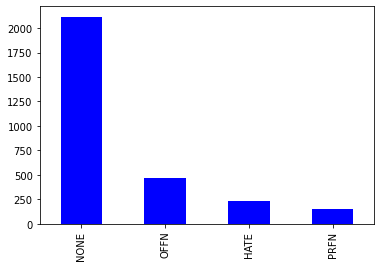

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

### Convering label into "0-NONE", "1-HATE", "2-OFFN", and "3-PRFN"

In [ ]:
import numpy as np
classes_list = ["NONE","HATE","OFFN","PRFN"]
label_index = data['task2'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:50])

[1 0 1 3 1 2 1 2 0 0 0 0 0 0 0 0 2 0 0 3 2 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 0 0 3 0 0 0 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=4)

In [ ]:
print(label_twoDimension[:10])

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


### Making of "text" Variable

In [ ]:
text = data['text']
text.head(10)

0                   1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो\n17000 सिखो, 5000 भोपाली, 3000 तमिलों का कत्लेआम करवाने वाला भारत रत्न कैसे हो सके है?
1          RT @Vishesh4: @jawaharyadavbjp जवाहर यादव, अगर हिम्मत है तो पूरा वीडियो डालो फिर तुम्हारे झूठ सामने आएंगे।\nदीपेंदर ने साफ कहा, कि भाजपा और…
2         RT @FunKeyBaat: #भगवा वस्त्र पहन कर मतदान नही कर सकते लेकिन बुरखा पहन के कर सकते हैं @yadavakhilesh ?\n\nये आज़मगढ़ है और यहाँ से "टोटी चोर"…
3                                                                                          Yey nina khothani labafazi benu phambili Finish and klaar 🍑🌊
4          RT @Rajeshbhanjan2: जब भी कोई सिकुलर कोंग्रेसी गुलाम चाटुकार चरणचाट चमचा 'गाय' और 'बछड़े' को लेकर भाजपा पर तंज कसता हुआ दिखे तो इतिहास के झ…
5          RT @AkalLess: काश ऐसा क़ानून अगर हमारे यहाँ होता तो पूरी @AamAadmiParty सर @ArvindKejriwal के साथ तिहाड़ जेल में निर्विरोध चुनाव लड़ रही हो…
6    RT @Aaliya11_: मुस्लिम_ईसाईयों की जबरन\n  नसबंदी कर देनी चाहिए\n      साध्वी ठाकुर\

### Dataset Pre-processing

In [ ]:
import re 

def text_clean(text):
     # Pre process and convert texts to a list of words
    
    text=text.lower()

    # Clean the text
    # text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    #text = re.sub(r"[A-Za-z]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)

    text = re.sub(r"@", " ", text)
    text = re.sub(r"rt", " ", text)
    text = re.sub(r"\n", " ", text)
    #text = re.sub(r"[0-9]", " ", text)

    
    return text

In [ ]:
clean_text = text.apply(lambda x:text_clean(x))
clean_text.head(20)

0              1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो 17000 सिखो, 5000 भोपाली, 3000 तमिलों का कत्लेआम करवाने वाला भारत रत्न कैसे हो सके है?
1         vishesh4:  jawaharyadavbjp जवाहर यादव, अगर हिम्मत है तो पूरा वीडियो डालो फिर तुम्हारे झूठ सामने आएंगे। दीपेंदर ने साफ कहा, कि भाजपा और…
2         funkeybaat: #भगवा वस्त्र पहन कर मतदान नही कर सकते लेकिन बुरखा पहन के कर सकते हैं  yadavakhilesh ?  ये आज़मगढ़ है और यहाँ से "टोटी चोर"…
3                                                                                    yey nina khothani labafazi benu phambili finish and klaar 🍑🌊
4        rajeshbhanjan2: जब भी कोई सिकुलर कोंग्रेसी गुलाम चाटुकार चरणचाट चमचा 'गाय' और 'बछड़े' को लेकर भाजपा पर तंज कसता हुआ दिखे तो इतिहास के झ…
5         akalless: काश ऐसा क़ानून अगर हमारे यहाँ होता तो पूरी  aamaadmipa y सर  arvindkejriwal के साथ तिहाड़ जेल में निर्विरोध चुनाव लड़ रही हो…
6        aaliya11_: मुस्लिम_ईसाईयों की जबरन   नसबंदी कर देनी चाहिए       साध्वी ठाकुर   मैडम जब अपनी जमीन    बंजर हो तो दूसर

# Removing Stopwords

In [ ]:
pip install cltk

In [ ]:
import cltk
from cltk.corpus.swadesh import Swadesh
swadesh = Swadesh('hi')
print(swadesh.words())

['मैं', 'तू', 'वह', 'हम', 'तुम', 'वे', 'यह', 'वह', 'यहाँ', 'वहाँ', 'कौन', 'क्या', 'कहाँ', 'कब', 'कैसा', 'नहीं', 'सब', 'बहुत', 'कुछ', 'थोड़ा', 'दूसरा', 'एक', 'दो', 'तीन', 'चार', 'पाँच', 'बड़ा', 'लम्बा', 'चौड़ा', 'गाढ़ा', 'भारी', 'छोटा', 'छोटा', 'तंग', 'पतला', 'औरत', 'आदमी', 'इंसान', 'बच्चा', 'पत्नी', 'पति', 'माता', 'पिता', 'जानवर', 'मछली', 'चिड़िया', 'कुत्ता', 'जूँ', 'साँप', 'कीड़ा', 'पेड़', 'जंगल', 'डण्डा', 'फल', 'बीज', 'पत्ता', 'जड़', 'छाल', 'फूल', 'घास', 'रस्सी', 'त्वचा', 'माँस', 'ख़ून', 'हड्डी', 'चरबी', 'अंडा', 'सींग', 'पूँछ', 'पंख', 'बाल', 'सर', 'कान', 'आँख', 'नाक', 'मुँह', 'दाँत', 'जीभ', 'नाख़ुन', 'पैर', 'टांग', 'घुटना', 'हाथ', 'पंख', 'पेट', 'अंतड़ी', 'गरदन', 'पीठ', 'छाती', 'दिल', 'जिगर', 'पीना', 'खाना', 'काटना', 'चूसना', 'थूकना', 'उल्टी करना', 'फूँक मारना', 'साँस लेना', 'हँसना', 'देखना', 'सुनना', 'जानना', 'सोचना', 'सूंघना', '(से) डरना ((se) ḍarnā', 'सोना', 'जीना', 'मरना', 'मारना', 'लड़ना', 'शिकार करना', 'मारना', 'काटना', 'बंटना', 'भोंकना', 'खरोंचना', 'खोदना', 'तैरना', 'उड़ना', 'च

In [ ]:
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in swadesh.words()]
    return " ".join(text1)

In [ ]:
clean_text_ns = clean_text.apply(lambda x: stop_words_removal(x))

### Tokenization using "keras"

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_ns)

### Making Vocab for words

In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

13995


In [ ]:
l = tok_all.word_index
print(l)

{'है': 1, 'के': 2, 'की': 3, 'को': 4, 'से': 5, 'का': 6, 'तो': 7, 'भी': 8, 'कर': 9, 'हो': 10, 'हैं': 11, 'ने': 12, 'ही': 13, 'ये': 14, 'मोदी': 15, 'पर': 16, 'कि': 17, 'जी': 18, 'नही': 19, 'अब': 20, 'रहा': 21, 'है।': 22, 'जो': 23, 'देश': 24, 'हर': 25, 'लिए': 26, 'रहे': 27, 'कोई': 28, 'वो': 29, 'गया': 30, 'जब': 31, 'वोट': 32, 'रही': 33, 'मे': 34, 'इस': 35, 'था': 36, 'आप': 37, 'हुआ': 38, 'आज': 39, 'चुनाव': 40, 'कांग्रेस': 41, '।': 42, 'दिया': 43, 'करने': 44, 'किया': 45, 'फिर': 46, 'अपने': 47, 'ना': 48, 'लोग': 49, 'बात': 50, 'जनता': 51, 'न': 52, 'वाले': 53, 'कहा': 54, 'तक': 55, 'साथ': 56, 'hai': 57, 'किसी': 58, 'मुझे': 59, 'माँ': 60, 'अपनी': 61, 'बाद': 62, 'थे': 63, 'सरकार': 64, 'या': 65, 'बार': 66, 'लेकिन': 67, 'करते': 68, 'narendramodi': 69, 'आ': 70, 'होता': 71, 'rahulgandhi': 72, 'दे': 73, 'भारत': 74, 'घर': 75, 'थी': 76, 'गए': 77, 'arvindkejriwal': 78, 'हूँ': 79, 'राहुल': 80, 'जैसे': 81, 'तरह': 82, 'पहले': 83, 'भाजपा': 84, 'मसूद': 85, 'कम': 86, 'होगा': 87, 'आतंकी': 88, 'घोषित': 89, 'हुए':

### encoding or sequencing

In [ ]:
encoded_clean_text_ns = tok_all.texts_to_sequences(clean_text_ns)
print(clean_text_ns[0])
print(encoded_clean_text_ns[0])

1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो 17000 सिखो, 5000 भोपाली, 3000 तमिलों का कत्लेआम करवाने वाला भारत रत्न कैसे हो सके है?
[156, 5015, 4, 1067, 16, 2222, 88, 10, 956, 1, 7, 5016, 3076, 5017, 5018, 5019, 5020, 6, 2223, 1068, 111, 74, 2224, 136, 10, 956, 1]


### Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_ns = sequence.pad_sequences(encoded_clean_text_ns, maxlen=max_length, padding='pre')

# ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=2)

In [ ]:
padded_clean_text_ADASYN, label_twoDimension_ADASYN = ad.fit_sample(padded_clean_text_ns, label_twoDimension)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
label_twoDimension.shape

(2963, 4)

In [ ]:
label_twoDimension_ADASYN.shape

(8391, 4)

# **Test Data Pre-processing**

## **Data test Reading**

In [ ]:
data_t = pd.read_csv('drive/My Drive/HASOC Dataset/HASOC TEST Dataset/hindi_test_1509.csv')
pd.set_option('display.max_colwidth',150) 
data_t.head(10)

,tweet_id,text,task1,task2,ID
0,1127781647783301120,@Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको जान देने की जरूरत नहीं है।\nरक्षा मंत्री एक महिला है वो किसी\nभी लड़की को इस्तेमाल नहीं करेंगी।🤔,HOF,OFFN,hasoc_2020_hi_1938
1,1127492853171535872,"RT @pratimamishra04: दिल्ली के मुख्यमंत्री @ArvindKejriwal ने अपने पूरे परिवार के साथ वोट डाला, कहा मैंने उस पार्टी को वोट दिया जिसने दिल्…",NOT,NONE,hasoc_2020_hi_1201
2,1123638375896903681,"RT @nishantdabre2: आज एक तरफ खुशी है, तो एक तरफ दुख\nएक तरफ मसूद अजहर को पूरे विश्व के आतंकी के रूप में मान लिया गया ।\nऔर एक तरफ देश के गढ़…",NOT,NONE,hasoc_2020_hi_1628
3,1127496460310683648,@BJP4India @HardeepSPuri जिस कुनबे के लोग :-\n12वीं पास डिग्री छुपाने वाली को शिक्षा मंत्री बनाते हों\nविदेशों का फोटो दिखाकर खुद का विकास बताते ह...,NOT,NONE,hasoc_2020_hi_3257
4,1127667277535399937,@manakgupta बादल....😂😂😂,NOT,NONE,hasoc_2020_hi_4133
5,1127760189732483072,@manakgupta देखो भक्त एंकरों की पोस्ट,NOT,NONE,hasoc_2020_hi_1773
6,1127743240558366720,RT @nehapatel342634: जब भी मेरे भाई के दोस्त को कुछ करने का मान करता था वो मुझे घर के पीछे ले जाता था । https://t.co/Zhjs7DTgHb,HOF,PRFN,hasoc_2020_hi_1957
7,1127597698209550342,"RT @iVinayShukla_: ➡️IBM 1951 में भारत आयी थी, तब राजीव गांधी 7 वर्ष के थे और अंगूठा चूसते थे,\n➡️HCL का गठन 1976 में हुआ था, जब राजीव गांधी…",HOF,NONE,hasoc_2020_hi_3913
8,1127473043507482624,अब केवल दो चरण बचे हैं अपने दोनों चरणों को मतदान केंद्र तक अवश्य ले जाये l राष्ट्रहित मे मतदान अवश्य करें l,NOT,NONE,hasoc_2020_hi_1338
9,1123817908864417792,"@DrKumarVishwas @AmritanjaliAbh1 @ImranKhanPTI 56"" का एक और कमाल https://t.co/ejreB9VgDc",NOT,NONE,hasoc_2020_hi_4312


In [ ]:
data_t.shape

(663, 5)

In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


## **Making Of Label variables**

In [ ]:
label_t = data_t['task2']
label_t.head()

0    OFFN
1    NONE
2    NONE
3    NONE
4    NONE
Name: task2, dtype: object

NONE    493
OFFN     87
HATE     56
PRFN     27
Name: task2, dtype: int64


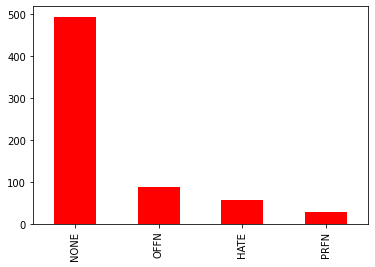

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

## **Convering label into "0" or "1"**

In [ ]:
import numpy as np
classes_list_t = ["NONE","HATE","OFFN","PRFN"]
label_t_index = data_t['task2'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])

[2 0 0 0 0 0 3 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=4)

In [ ]:
print(label_twoDimension_t[:10])

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


## **Making of text variable**

In [ ]:
text_t = data_t['text']
text_t.head(10)

0          @Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको जान देने की जरूरत नहीं है।\nरक्षा मंत्री एक महिला है वो किसी\nभी लड़की को इस्तेमाल नहीं करेंगी।🤔
1              RT @pratimamishra04: दिल्ली के मुख्यमंत्री @ArvindKejriwal ने अपने पूरे परिवार के साथ वोट डाला, कहा मैंने उस पार्टी को वोट दिया जिसने दिल्…
2            RT @nishantdabre2: आज एक तरफ खुशी है, तो एक तरफ दुख\nएक तरफ मसूद अजहर को पूरे विश्व के आतंकी के रूप में मान लिया गया ।\nऔर एक तरफ देश के गढ़…
3    @BJP4India @HardeepSPuri जिस कुनबे के लोग :-\n12वीं पास डिग्री छुपाने वाली को शिक्षा मंत्री बनाते हों\nविदेशों का फोटो दिखाकर खुद का विकास बताते ह...
4                                                                                                                                  @manakgupta बादल....😂😂😂
5                                                                                                                    @manakgupta देखो भक्त एंकरों की पोस्ट
6                          RT @nehapatel342634: जब भी मेरे भाई के दोस्

## **Test Dataset Pre-processings**

    1. Remove unwanted words
    2. Removing Stopwords
    3. Tokenization
    4. Encoding or Sequencing
    5. Pre-padding



### 1. Removing Unwanted Words

In [ ]:
import re 

def text_clean(text):
     # Pre process and convert texts to a list of words
    
    text=text.lower()

    # Clean the text
    # text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    #text = re.sub(r"[A-Za-z]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)

    text = re.sub(r"@", " ", text)
    text = re.sub(r"rt", " ", text)
    text = re.sub(r"\n", " ", text)
    #text = re.sub(r"[0-9]", " ", text)

    return text

In [ ]:
clean_text_t = text_t.apply(lambda x:text_clean(x))
clean_text_t.head(10)

0              kinjal_dubey_ इसके लिए तैयारी हो रखी है आपको जान देने की जरूरत नहीं है। रक्षा मंत्री एक महिला है वो किसी भी लड़की को इस्तेमाल नहीं करेंगी।🤔
1                  pratimamishra04: दिल्ली के मुख्यमंत्री  arvindkejriwal ने अपने पूरे परिवार के साथ वोट डाला, कहा मैंने उस पार्टी को वोट दिया जिसने दिल्…
2                  nishantdabre2: आज एक तरफ खुशी है, तो एक तरफ दुख एक तरफ मसूद अजहर को पूरे विश्व के आतंकी के रूप में मान लिया गया । और एक तरफ देश के गढ़…
3     bjp4india  hardeepspuri जिस कुनबे के लोग :- 12वीं पास डिग्री छुपाने वाली को शिक्षा मंत्री बनाते हों विदेशों का फोटो दिखाकर खुद का विकास बताते हों...
4                                                                                                                                   manakgupta बादल....😂😂😂
5                                                                                                                     manakgupta देखो भक्त एंकरों की पोस्ट
6                                                     nehapatel342634:

## 2. Removing stopwords

In [ ]:
pip install cltk

In [ ]:
import cltk
from cltk.corpus.swadesh import Swadesh
swadesh = Swadesh('hi')
print(swadesh.words())

['मैं', 'तू', 'वह', 'हम', 'तुम', 'वे', 'यह', 'वह', 'यहाँ', 'वहाँ', 'कौन', 'क्या', 'कहाँ', 'कब', 'कैसा', 'नहीं', 'सब', 'बहुत', 'कुछ', 'थोड़ा', 'दूसरा', 'एक', 'दो', 'तीन', 'चार', 'पाँच', 'बड़ा', 'लम्बा', 'चौड़ा', 'गाढ़ा', 'भारी', 'छोटा', 'छोटा', 'तंग', 'पतला', 'औरत', 'आदमी', 'इंसान', 'बच्चा', 'पत्नी', 'पति', 'माता', 'पिता', 'जानवर', 'मछली', 'चिड़िया', 'कुत्ता', 'जूँ', 'साँप', 'कीड़ा', 'पेड़', 'जंगल', 'डण्डा', 'फल', 'बीज', 'पत्ता', 'जड़', 'छाल', 'फूल', 'घास', 'रस्सी', 'त्वचा', 'माँस', 'ख़ून', 'हड्डी', 'चरबी', 'अंडा', 'सींग', 'पूँछ', 'पंख', 'बाल', 'सर', 'कान', 'आँख', 'नाक', 'मुँह', 'दाँत', 'जीभ', 'नाख़ुन', 'पैर', 'टांग', 'घुटना', 'हाथ', 'पंख', 'पेट', 'अंतड़ी', 'गरदन', 'पीठ', 'छाती', 'दिल', 'जिगर', 'पीना', 'खाना', 'काटना', 'चूसना', 'थूकना', 'उल्टी करना', 'फूँक मारना', 'साँस लेना', 'हँसना', 'देखना', 'सुनना', 'जानना', 'सोचना', 'सूंघना', '(से) डरना ((se) ḍarnā', 'सोना', 'जीना', 'मरना', 'मारना', 'लड़ना', 'शिकार करना', 'मारना', 'काटना', 'बंटना', 'भोंकना', 'खरोंचना', 'खोदना', 'तैरना', 'उड़ना', 'च

In [ ]:
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in swadesh.words()]
    return " ".join(text1)

In [ ]:
clean_text_t_ns = clean_text_t.apply(lambda x : stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))
#text_str= str(clean_text_ns)

0                           kinjal_dubey_ इसके लिए तैयारी हो रखी है आपको जान देने की जरूरत है। रक्षा मंत्री महिला है वो किसी भी लड़की को इस्तेमाल करेंगी।🤔
1                  pratimamishra04: दिल्ली के मुख्यमंत्री  arvindkejriwal ने अपने पूरे परिवार के साथ वोट डाला, कहा मैंने उस पार्टी को वोट दिया जिसने दिल्…
2                                     nishantdabre2: आज तरफ खुशी है, तो तरफ दुख तरफ मसूद अजहर को पूरे विश्व के आतंकी के रूप मान लिया गया । तरफ देश के गढ़…
3     bjp4india  hardeepspuri जिस कुनबे के लोग :- 12वीं पास डिग्री छुपाने वाली को शिक्षा मंत्री बनाते हों विदेशों का फोटो दिखाकर खुद का विकास बताते हों...
4                                                                                                                                   manakgupta बादल....😂😂😂
5                                                                                                                     manakgupta देखो भक्त एंकरों की पोस्ट
6                                                         nehapatel342

## 3. Tokenization

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_ns)

In [ ]:
vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)

5011


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'है': 1, 'के': 2, 'की': 3, 'को': 4, 'का': 5, 'से': 6, 'तो': 7, 'भी': 8, 'कर': 9, 'ही': 10, 'हो': 11, 'ने': 12, 'मोदी': 13, 'हैं': 14, 'पर': 15, 'ये': 16, 'रहे': 17, 'कि': 18, 'नही': 19, 'जी': 20, 'लिए': 21, 'कोई': 22, 'वोट': 23, 'हर': 24, 'है।': 25, 'देश': 26, 'रहा': 27, 'वो': 28, 'गया': 29, 'अब': 30, 'जो': 31, 'था': 32, 'इस': 33, 'जब': 34, 'आप': 35, 'वाले': 36, 'आज': 37, 'करने': 38, 'मे': 39, 'न': 40, 'साथ': 41, 'थे': 42, 'या': 43, 'किया': 44, 'अपने': 45, 'बात': 46, 'रही': 47, 'दिया': 48, 'तक': 49, 'फिर': 50, 'hai': 51, 'अपनी': 52, 'मसूद': 53, '।': 54, 'घर': 55, 'कांग्रेस': 56, 'ना': 57, 'चुनाव': 58, 'बार': 59, 'दे': 60, 'किसी': 61, 'कहा': 62, 'जनता': 63, 'लेकिन': 64, 'भाई': 65, 'हुआ': 66, 'बाद': 67, 'करे': 68, 'जा': 69, 'पार्टी': 70, 'लोग': 71, 'भारत': 72, 'थी': 73, 'सरकार': 74, 'देने': 75, 'दिल्ली': 76, 'आतंकी': 77, 'मुझे': 78, 'होता': 79, '…': 80, 'सकता': 81, 'आ': 82, 'arvindkejriwal': 83, 'उस': 84, 'अजहर': 85, 'कह': 86, 'उसे': 87, 'होते': 88, 'अपना': 89, 'काम': 90, 'जाता': 91, 'ग

### 5. Encoding or Sequencing

In [ ]:
encoded_clean_text_t_ns = tok_all.texts_to_sequences(clean_text_t_ns)
print(clean_text_t_ns[0])
print(encoded_clean_text_t_ns[0])

 kinjal_dubey_ इसके लिए तैयारी हो रखी है आपको जान देने की जरूरत है। रक्षा मंत्री महिला है वो किसी भी लड़की को इस्तेमाल करेंगी।🤔
[247, 26, 2308, 10, 1834, 1, 266, 623, 195, 3, 716, 22, 620, 850, 753, 1, 29, 58, 8, 624, 4, 947]


### 6. Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_ns = sequence.pad_sequences(encoded_clean_text_t_ns, maxlen=max_length, padding='pre')

# **FastText** **Embedding**

In [ ]:
import os
import numpy as np

embeddings_index = {}
f = open('drive/My Drive/HASOC Dataset/Copy of cc.hi.300.vec', encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1876654 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

# **CNN 1 Model**

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300,weights = [embedding_matrix] , input_length=max_length, trainable = False)

In [ ]:
CNN1_model=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(4,activation="sigmoid")
                       ])

In [ ]:
CNN1_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          4198800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 128)          115328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [ ]:
from keras.optimizers import Adam
CNN1_model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])


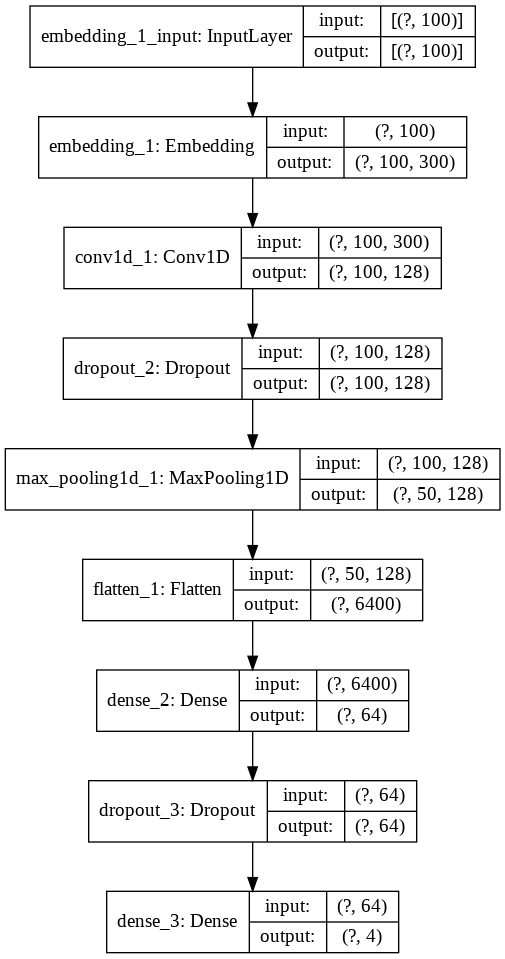

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_model, to_file='CNN1_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

### **Model Fitting or Training**

In [ ]:
hist = CNN1_model.fit(padded_clean_text_ns,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
93/93 [==============================] - 0s 4ms/step - loss: 0.5995 - accuracy: 0.6976
Epoch 2/200
93/93 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.7141
Epoch 3/200
93/93 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.7141
Epoch 4/200
93/93 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.7141
Epoch 5/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.7138
Epoch 6/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.7141
Epoch 7/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.7145
Epoch 8/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.7148
Epoch 9/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.7141
Epoch 10/200
93/93 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.7148
Epoch 11/

# log loss

In [ ]:
CNN1_model_predictions = CNN1_model.predict(padded_clean_text_t_ns)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_model_predictions)
log_loss_test

1.0926100715371578

# Classification Report

In [ ]:
predictions = np.zeros_like(CNN1_model_predictions)
predictions[np.arange(len(CNN1_model_predictions)), CNN1_model_predictions.argmax(1)] = 1

In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task2"])
print(df)

     task2
0        0
1        0
2        0
3        0
4        0
..     ...
658      0
659      0
660      0
661      0
662      0

[663 rows x 1 columns]


In [ ]:
df.to_csv("submission_HI_B.csv", index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       493
           1       0.42      0.09      0.15        56
           2       0.26      0.14      0.18        87
           3       0.43      0.11      0.18        27

   micro avg       0.73      0.73      0.73       663
   macro avg       0.47      0.32      0.34       663
weighted avg       0.66      0.73      0.68       663
 samples avg       0.73      0.73      0.73       663



# Epoch v/s Loss Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

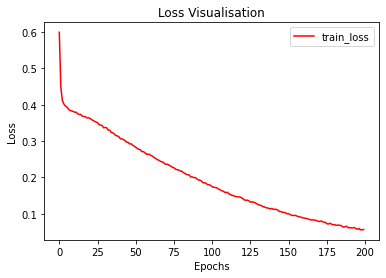

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_HASOC_Hindi_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_HASOC_Hindi_lossPlot.pdf') 

# Epoch v/s Accuracy Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

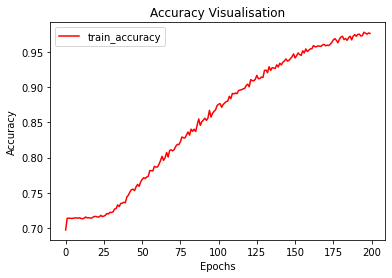

In [ ]:
plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_HASOC_Hindi_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_HASOC_Hindi_accuracyPlot.pdf') 

# Area under Curve-ROC

In [ ]:
pred_train = CNN1_model.predict(padded_clean_text_ns)
pred_test = CNN1_model.predict(padded_clean_text_t_ns)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_HASOC_Hindi_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_HASOC_Hindi_Area_RocPlot.pdf')

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

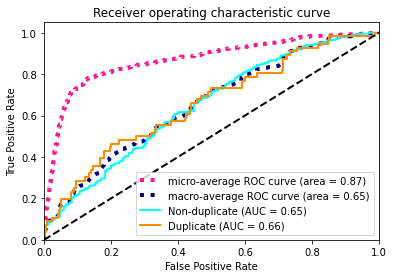

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)